In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentInfo = pd.read_csv('studentInfo.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')
#studentVle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')

In [3]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [4]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [5]:
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [6]:
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [7]:
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [8]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [9]:
#myString = "This is a link http://www.google.com"
#print (re.search("(?P<url>https?://[^\s]+)", myString).group("url"))

In [10]:
result = pd.merge(studentInfo,
                 studentAssessment,
                  
                 on='id_student')

In [11]:
result

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755,164,0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756,212,0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207314,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37437,169,0,60.0
207315,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37438,73,0,100.0
207316,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37439,150,0,60.0
207317,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37440,172,0,100.0


In [12]:
result2 = pd.merge(result,
                 studentRegistration,
                 on='id_student')

In [13]:
result2

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score,code_module_y,code_presentation_y,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0,AAA,2013J,-159.0,NaN
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0,AAA,2013J,-159.0,NaN
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0,AAA,2013J,-159.0,NaN
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755,164,0,85.0,AAA,2013J,-159.0,NaN
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756,212,0,82.0,AAA,2013J,-159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279796,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37437,169,0,60.0,GGG,2014J,-28.0,NaN
279797,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37438,73,0,100.0,GGG,2014J,-28.0,NaN
279798,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37439,150,0,60.0,GGG,2014J,-28.0,NaN
279799,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37440,172,0,100.0,GGG,2014J,-28.0,NaN


In [14]:
result3 = pd.merge(assessments,
                 courses,
                 on='code_module')

In [15]:
train = pd.merge(result2,
                 result3,
                 on='id_assessment')

In [16]:
train

,code_module_x,code_presentation_x_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,code_presentation_y_x,date_registration,date_unregistration,code_module,code_presentation_x_y,assessment_type,date,weight,code_presentation_y_y,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,2013J,-159.0,NaN,AAA,2013J,TMA,19.0,10.0,2013J,268
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,2013J,-159.0,NaN,AAA,2013J,TMA,19.0,10.0,2014J,269
2,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,2013J,-53.0,NaN,AAA,2013J,TMA,19.0,10.0,2013J,268
3,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,2013J,-53.0,NaN,AAA,2013J,TMA,19.0,10.0,2014J,269
4,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,2013J,-52.0,NaN,AAA,2013J,TMA,19.0,10.0,2013J,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968511,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,2014J,-23.0,NaN,GGG,2014J,CMA,229.0,0.0,2014J,269
968512,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,2014J,-23.0,NaN,GGG,2014J,CMA,229.0,0.0,2014B,241
968513,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,2014J,-129.0,NaN,GGG,2014J,CMA,229.0,0.0,2013J,261
968514,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,2014J,-129.0,NaN,GGG,2014J,CMA,229.0,0.0,2014J,269


In [17]:
train.dropna(inplace=True)

In [18]:
train

,code_module_x,code_presentation_x_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,code_presentation_y_x,date_registration,date_unregistration,code_module,code_presentation_x_y,assessment_type,date,weight,code_presentation_y_y,module_presentation_length
28,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,...,2013J,-180.0,96.0,AAA,2013J,TMA,19.0,10.0,2013J,268
29,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,...,2013J,-180.0,96.0,AAA,2013J,TMA,19.0,10.0,2014J,269
32,AAA,2014J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,...,2013J,-180.0,96.0,AAA,2013J,TMA,19.0,10.0,2013J,268
33,AAA,2014J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,...,2013J,-180.0,96.0,AAA,2013J,TMA,19.0,10.0,2014J,269
48,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,...,2013J,-170.0,72.0,AAA,2013J,TMA,19.0,10.0,2013J,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967476,GGG,2013J,600320,F,West Midlands Region,Lower Than A Level,40-50%,35-55,0,30,...,2013J,-37.0,167.0,GGG,2014J,CMA,229.0,0.0,2014J,269
967477,GGG,2013J,600320,F,West Midlands Region,Lower Than A Level,40-50%,35-55,0,30,...,2013J,-37.0,167.0,GGG,2014J,CMA,229.0,0.0,2014B,241
967481,GGG,2014J,600320,F,West Midlands Region,Lower Than A Level,40-50%,35-55,1,30,...,2013J,-37.0,167.0,GGG,2014J,CMA,229.0,0.0,2013J,261
967482,GGG,2014J,600320,F,West Midlands Region,Lower Than A Level,40-50%,35-55,1,30,...,2013J,-37.0,167.0,GGG,2014J,CMA,229.0,0.0,2014J,269


In [19]:
train.dtypes

code_module_x                  object
code_presentation_x_x          object
id_student                      int64
gender                         object
region                         object
highest_education              object
imd_band                       object
age_band                       object
num_of_prev_attempts            int64
studied_credits                 int64
disability                     object
final_result                   object
id_assessment                   int64
date_submitted                  int64
is_banked                       int64
score                         float64
code_module_y                  object
code_presentation_y_x          object
date_registration             float64
date_unregistration           float64
code_module                    object
code_presentation_x_y          object
assessment_type                object
date                          float64
weight                        float64
code_presentation_y_y          object
module_prese

In [20]:
train.isnull().sum()

code_module_x                 0
code_presentation_x_x         0
id_student                    0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
id_assessment                 0
date_submitted                0
is_banked                     0
score                         0
code_module_y                 0
code_presentation_y_x         0
date_registration             0
date_unregistration           0
code_module                   0
code_presentation_x_y         0
assessment_type               0
date                          0
weight                        0
code_presentation_y_y         0
module_presentation_length    0
dtype: int64

In [21]:
train['code_module_x'].unique()

array(['AAA', 'BBB', 'FFF', 'CCC', 'EEE', 'DDD', 'GGG'], dtype=object)

In [22]:
train['code_presentation_x_x'].unique()

array(['2013J', '2014J', '2014B', '2013B'], dtype=object)

In [23]:
train['id_student'].unique()

array([  65002,   94961,  106247, ..., 2342238, 2357806, 2679821],
      dtype=int64)

In [24]:
train['gender'].unique()

array(['F', 'M'], dtype=object)

In [25]:
train['region'].unique()

array(['East Anglian Region', 'South Region', 'West Midlands Region',
       'South East Region', 'South West Region', 'North Region',
       'North Western Region', 'East Midlands Region', 'Yorkshire Region',
       'Wales', 'London Region', 'Scotland', 'Ireland'], dtype=object)

In [26]:
train['highest_education'].unique()

array(['A Level or Equivalent', 'Lower Than A Level', 'HE Qualification',
       'No Formal quals', 'Post Graduate Qualification'], dtype=object)

In [27]:
train['imd_band'].unique()

array(['70-80%', '80-90%', '50-60%', '90-100%', '30-40%', '40-50%',
       '60-70%', '0-10%', '20-30%', '10-20'], dtype=object)

In [28]:
train['age_band'].unique()

array(['0-35', '35-55', '55<='], dtype=object)

In [29]:
train['num_of_prev_attempts'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [30]:
train['studied_credits'].unique()

array([ 60, 345, 210,  90, 120, 240, 180,  75, 330, 270, 150,  30, 190,
       160, 300,  85, 195, 105, 135, 220, 100, 110,  70,  80, 165, 130,
        40, 310, 235, 250, 115,  45, 225, 170, 355, 140, 255,  55,  95,
       205], dtype=int64)

In [31]:
train['disability'].unique()

array(['N', 'Y'], dtype=object)

In [32]:
train['final_result'].unique()

array(['Withdrawn', 'Fail', 'Pass', 'Distinction'], dtype=object)

In [33]:
train['id_assessment'].unique()

array([ 1752,  1753,  1754,  1755,  1756,  1758,  1759,  1760,  1761,
        1762, 34886, 34887, 34888, 34889, 34890, 34891, 34892, 34893,
       34894, 34895, 34896, 34897, 34873, 34874, 34875, 34876, 34877,
       34878, 34879, 34880, 34881, 34882, 34883, 34884, 14984, 14985,
       14991, 14992, 14986, 14987, 14988, 14989, 14993, 14994, 14995,
       15008, 15009, 15010, 15015, 15016, 15017, 14996, 14997, 14998,
       14999, 15003, 15004, 15005, 15006, 15000, 15001, 15007, 15020,
       15021, 15022, 15023, 15024, 15011, 15013, 15018, 15019, 15012,
       34899, 25348, 25349, 37415, 37416, 37417, 37418, 37419, 37420,
       37421, 37422, 37423, 25362, 34860, 34861, 34862, 24291, 24292,
       24295, 24296, 24297, 25334, 25335, 25341, 25342, 37425, 37426,
       37427, 37428, 37429, 37430, 37431, 37432, 37433, 25350, 25351,
       25352, 25353, 25354, 25336, 25337, 25338, 25343, 25344, 25345,
       25346, 25347, 25355, 25356, 25357, 25358, 25359, 25360, 25361,
       25363, 25364,

In [34]:
train['date_submitted'].unique()

array([ 17,  32,  18,  19,  54,  25,  20,  27,  21,  29,  36,  23,  26,
        14,  24,  33,  51,  64,  49,  63,  90,  61,  59,  72,  57,  60,
        53,  48,  58,  52,  55,  75, 115, 127, 122, 118, 131, 119, 117,
       124,  85, 139, 121, 120, 166, 171, 167, 217,  -1,  22,  40,  31,
        62,  69,  71,  45,  74,  93, 125, 129, 116, 132, 123, 128, 138,
       114, 144, 180, 176, 178, 173, 165, 174, 175, 169, 168, 162, 172,
       211, 227, 215, 216, 214, 234, 218, 212, 222,  11,   7,  30,   8,
        38,  28,  15,   5,  37,   6,  73,  16,   9,  39,  10,  42,  46,
        50,  47,  67,  56,  66,  44,  81,  68,  43,  87,  86,  92,  82,
        83, 109,  95, 104,  94, 101, 102,  88,  91,  70,  97,  98, 100,
        84,  76, 107, 103, 108, 106,  99, 133, 126, 185, 130, 134, 143,
       137, 148, 135, 141, 136, 160, 151, 150, 140, 170, 152, 177, 179,
       184, 155, 186, 209, 226, 147,  77, 201, 189,  41, 110, 229, 182,
       187,  35, 192, 453,  12, 486, 411, 341,  89,  13, 590, 30

In [35]:
train['is_banked'].unique()

array([0, 1], dtype=int64)

In [36]:
train['score'].unique()

array([ 66.,  74.,  67.,  85.,  72.,  45.,  52.,  68.,  65.,  76.,  55.,
        51.,  70.,  84.,  36.,  86.,  75.,  39.,  82.,  78.,  30.,  60.,
        71.,  11.,  77.,  62.,  64.,  87.,  80.,  42.,  57.,  90.,  40.,
        53.,  38.,  83.,  47.,  50.,  35.,  54.,  59.,  37.,  34.,  79.,
        63.,  58.,  73.,  44.,  61.,  88.,  24.,  95.,  69.,  32.,  56.,
        46.,  81.,  43.,  41.,  98.,  92.,  94.,  96., 100.,   0.,  48.,
        26.,  28.,  18.,  16.,  22.,  91.,  33.,  27.,  20.,  49.,  93.,
        13.,  97.,  12.,  29.,  31.,  25.,  23.,  89.,  19.,  99.,  14.,
        10.,  15.,   7.,   2.,   5.,   9.,  21.,   1.,   8.,  17.,   6.,
         3.,   4.])

In [37]:
train['code_module_y'].unique()

array(['AAA', 'FFF', 'CCC', 'EEE', 'DDD', 'BBB', 'GGG'], dtype=object)

In [38]:
train['code_presentation_y_x'].unique()

array(['2013J', '2014J', '2014B', '2013B'], dtype=object)

In [39]:
train['date_registration'].unique()

array([-180., -170.,    5., -197., -143.,  -32., -110., -138., -174.,
        -64.,  -46.,  -24.,  -39.,  -57.,  -73.,  -79., -186., -156.,
        -17., -108.,  -11.,  -67., -192., -196.,  -71.,  -31.,  -60.,
        -43., -154.,  -30.,  -42.,  -63., -124., -198.,  -16.,  -65.,
        -59.,  -28.,  -45.,  -53., -101.,  -35.,  -52.,  -38., -137.,
       -106.,  -87.,  -99.,  -56.,  -81.,  -23.,  -80., -129.,  -72.,
       -155.,  -70., -103.,  -74.,  -88., -135.,  -22., -115.,   -8.,
        -44., -128.,  -25., -193., -107.,  -26.,  -29., -123.,  -92.,
       -113., -118., -120., -117., -109.,  -95.,  -27.,  -68.,  -61.,
        -36.,  -97.,  -50.,  -37.,  -86., -144., -102., -146.,  -49.,
        -18.,  -34., -126., -280., -185., -160.,  -78., -168.,  -55.,
       -173., -165., -194., -206.,  -15.,  -20., -114., -141., -150.,
        -21.,   -9.,  -12.,  -33.,  -62., -172., -178.,  -93., -148.,
       -127.,   28., -184.,  -10.,  -94.,  -84.,  -82.,  -90.,  -51.,
        -13.,  -75.,

In [40]:
train['date_unregistration'].unique()

array([  96.,   72.,  175.,  135.,  143.,  144.,  129.,   58.,  158.,
        191.,  123.,  201.,   60.,  166.,  109.,  170.,  -87.,  187.,
        177.,   53.,   65.,  160.,   51.,  202.,  172.,  119.,   73.,
        240.,  128.,  173.,  203.,   37.,  103.,  138.,  163.,  178.,
        242.,  220.,  114.,  199.,   39.,  219.,  185.,   23.,   27.,
         63.,  -19.,   93.,  164.,  235.,  241.,  207.,  234.,  104.,
         67.,  229.,  132.,  165.,  227.,  174.,   80.,  228.,  180.,
        182.,  213.,  108.,  110.,   34.,   55.,   12.,  146.,   38.,
        226.,   32.,  149.,  111.,  -23.,   -8.,  -25.,  157.,   44.,
        -30.,  -63.,  -74., -105.,  -40.,  -46.,  -73.,   47.,  -85.,
        -52.,  -43.,  -92.,   -1.,  223.,  -51.,  -22.,  -45.,  171.,
          7.,  145.,  107.,  100.,   17.,    0.,  -72.,   94.,    9.,
        167.,  -68., -113.,  130.,   31.,   -5.,  -64., -103.,  142.,
        101.,  198.,   26.,  118.,   11.,   33., -110.,  -67.,    2.,
         45.,  156.,

In [41]:
train['code_module'].unique()

array(['AAA', 'FFF', 'BBB', 'DDD', 'GGG', 'CCC', 'EEE'], dtype=object)

In [42]:
train.dtypes

code_module_x                  object
code_presentation_x_x          object
id_student                      int64
gender                         object
region                         object
highest_education              object
imd_band                       object
age_band                       object
num_of_prev_attempts            int64
studied_credits                 int64
disability                     object
final_result                   object
id_assessment                   int64
date_submitted                  int64
is_banked                       int64
score                         float64
code_module_y                  object
code_presentation_y_x          object
date_registration             float64
date_unregistration           float64
code_module                    object
code_presentation_x_y          object
assessment_type                object
date                          float64
weight                        float64
code_presentation_y_y          object
module_prese

In [43]:
train['code_presentation_x_y'].unique()

array(['2013J', '2014J', '2014B', '2013B'], dtype=object)

In [44]:
train['assessment_type'].unique()

array(['TMA', 'CMA', 'Exam'], dtype=object)

In [45]:
train['date'].unique()

array([ 19.,  54., 117., 166., 215.,  24.,  52.,  87., 129., 171., 227.,
        47.,  96., 131., 173., 236.,  89., 124., 159., 187.,  12.,  40.,
        82., 208., 110., 152., 201., 194.,  25.,  53.,  61., 229.,  20.,
        32., 109.,  18.,  67., 144.,  23.,  51., 222.,  88., 123., 165.,
       207., 261.,  81., 116., 151.,  79., 114., 149., 170., 206.,  74.,
       158., 200., 241.,  41.,  62., 111., 146.,  94., 136., 199., 102.,
       137.,  33.,  68., 240., 214., 195.])

In [46]:
train['weight'].unique()

array([ 10. ,  20. ,  30. ,  12.5,  25. ,   0. ,   5. ,  18. ,   1. ,
        35. ,   9. ,  22. ,   2. ,   7. ,   8. ,   7.5,   3. ,  17.5,
       100. ,  15. ,   4. ,   6. ,  16. ,  28. ])

In [47]:
train['code_presentation_y_y'].unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [48]:
train['highest_education'].unique()

array(['A Level or Equivalent', 'Lower Than A Level', 'HE Qualification',
       'No Formal quals', 'Post Graduate Qualification'], dtype=object)

In [49]:
train['module_presentation_length'].unique()

array([268, 269, 240, 241, 262, 234, 261], dtype=int64)

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [51]:
plt.rcParams["figure.figsize"] = (15,5)

In [52]:
train['final_result'].unique()

array(['Withdrawn', 'Fail', 'Pass', 'Distinction'], dtype=object)

<AxesSubplot:xlabel='final_result', ylabel='score'>

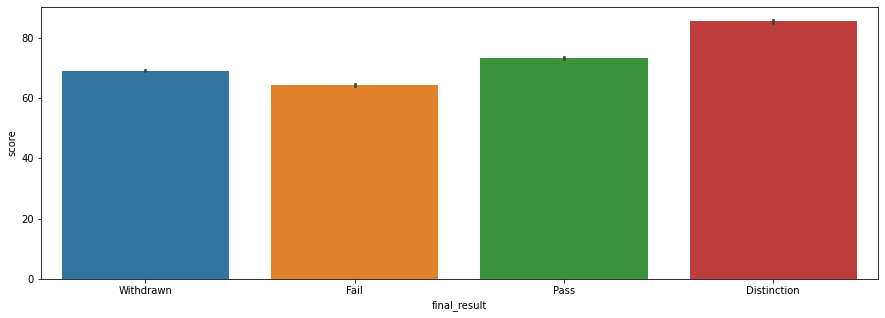

In [53]:
sns.barplot(x='final_result', y='score', data=train)

In [54]:
train['assessment_type'].unique()

array(['TMA', 'CMA', 'Exam'], dtype=object)

<AxesSubplot:xlabel='assessment_type', ylabel='score'>

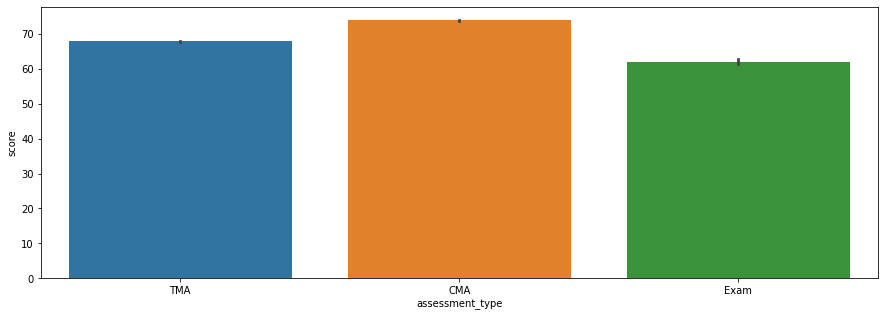

In [55]:
sns.barplot(x='assessment_type', y='score', data=train)

In [56]:
train.dtypes

code_module_x                  object
code_presentation_x_x          object
id_student                      int64
gender                         object
region                         object
highest_education              object
imd_band                       object
age_band                       object
num_of_prev_attempts            int64
studied_credits                 int64
disability                     object
final_result                   object
id_assessment                   int64
date_submitted                  int64
is_banked                       int64
score                         float64
code_module_y                  object
code_presentation_y_x          object
date_registration             float64
date_unregistration           float64
code_module                    object
code_presentation_x_y          object
assessment_type                object
date                          float64
weight                        float64
code_presentation_y_y          object
module_prese

In [57]:
#y=train['final_result']

In [58]:
train.drop(columns=['date_submitted','is_banked','date_registration','date','weight'], inplace=True)

In [59]:
train

,code_module_x,code_presentation_x_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,id_assessment,score,code_module_y,code_presentation_y_x,date_unregistration,code_module,code_presentation_x_y,assessment_type,code_presentation_y_y,module_presentation_length
28,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,...,1752,66.0,AAA,2013J,96.0,AAA,2013J,TMA,2013J,268
29,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,...,1752,66.0,AAA,2013J,96.0,AAA,2013J,TMA,2014J,269
32,AAA,2014J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,...,1752,66.0,AAA,2013J,96.0,AAA,2013J,TMA,2013J,268
33,AAA,2014J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,...,1752,66.0,AAA,2013J,96.0,AAA,2013J,TMA,2014J,269
48,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,...,1752,74.0,AAA,2013J,72.0,AAA,2013J,TMA,2013J,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967476,GGG,2013J,600320,F,West Midlands Region,Lower Than A Level,40-50%,35-55,0,30,...,37443,60.0,GGG,2013J,167.0,GGG,2014J,CMA,2014J,269
967477,GGG,2013J,600320,F,West Midlands Region,Lower Than A Level,40-50%,35-55,0,30,...,37443,60.0,GGG,2013J,167.0,GGG,2014J,CMA,2014B,241
967481,GGG,2014J,600320,F,West Midlands Region,Lower Than A Level,40-50%,35-55,1,30,...,37443,60.0,GGG,2013J,167.0,GGG,2014J,CMA,2013J,261
967482,GGG,2014J,600320,F,West Midlands Region,Lower Than A Level,40-50%,35-55,1,30,...,37443,60.0,GGG,2013J,167.0,GGG,2014J,CMA,2014J,269


In [60]:
train.drop(columns=['module_presentation_length','code_module','code_presentation_x_y','date_unregistration','disability','id_student','id_assessment','assessment_type','code_presentation_y_x'], inplace=True)

In [61]:
train

,code_module_x,code_presentation_x_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,score,code_module_y,code_presentation_y_y
28,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,Withdrawn,66.0,AAA,2013J
29,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,Withdrawn,66.0,AAA,2014J
32,AAA,2014J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,Fail,66.0,AAA,2013J
33,AAA,2014J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,Fail,66.0,AAA,2014J
48,AAA,2013J,M,South Region,Lower Than A Level,70-80%,35-55,0,60,Withdrawn,74.0,AAA,2013J
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967476,GGG,2013J,F,West Midlands Region,Lower Than A Level,40-50%,35-55,0,30,Withdrawn,60.0,GGG,2014J
967477,GGG,2013J,F,West Midlands Region,Lower Than A Level,40-50%,35-55,0,30,Withdrawn,60.0,GGG,2014B
967481,GGG,2014J,F,West Midlands Region,Lower Than A Level,40-50%,35-55,1,30,Pass,60.0,GGG,2013J
967482,GGG,2014J,F,West Midlands Region,Lower Than A Level,40-50%,35-55,1,30,Pass,60.0,GGG,2014J


In [62]:
df = pd.DataFrame(train)

df.to_csv (r'C:/Users/jpinf/Desktop/Kelly/upload.csv', index = False, header=True)

In [63]:
 train['code_module_x'].unique()

array(['AAA', 'BBB', 'FFF', 'CCC', 'EEE', 'DDD', 'GGG'], dtype=object)

In [64]:
train.loc[train['code_module_x']=='AAA', 'code_module_x'] = 0
train.loc[train['code_module_x']=='BBB', 'code_module_x'] = 1
train.loc[train['code_module_x']=='FFF', 'code_module_x'] = 2
train.loc[train['code_module_x']=='CCC', 'code_module_x'] = 3
train.loc[train['code_module_x']=='EEE', 'code_module_x'] = 4
train.loc[train['code_module_x']=='DDD', 'code_module_x'] = 5
train.loc[train['code_module_x']=='GGG', 'code_module_x'] = 6




In [64]:
 train['code_presentation_x_x'].unique()

array(['2013J', '2014J', '2014B', '2013B'], dtype=object)

In [65]:
train.loc[train['code_presentation_x_x']=='2013J', 'code_presentation_x_x'] = 0
train.loc[train['code_presentation_x_x']=='2014J', 'code_presentation_x_x'] = 1
train.loc[train['code_presentation_x_x']=='2014B', 'code_presentation_x_x'] = 2
train.loc[train['code_presentation_x_x']=='2013B', 'code_presentation_x_x'] = 3


In [66]:
 train['gender'].unique()

array(['F', 'M'], dtype=object)

In [67]:
train.loc[train['gender']=='F', 'gender'] = 0
train.loc[train['gender']=='M', 'gender'] = 1

In [68]:
 train['region'].unique()

array(['East Anglian Region', 'South Region', 'West Midlands Region',
       'South East Region', 'South West Region', 'North Region',
       'North Western Region', 'East Midlands Region', 'Yorkshire Region',
       'Wales', 'London Region', 'Scotland', 'Ireland'], dtype=object)

In [69]:
train.loc[train['region']=='East Anglian Region', 'region'] = 0
train.loc[train['region']=='South Region', 'region'] = 1
train.loc[train['region']=='West Midlands Region', 'region'] = 2
train.loc[train['region']=='South East Region', 'region'] = 3
train.loc[train['region']=='South West Region', 'region'] = 4
train.loc[train['region']=='North Region', 'region'] = 5
train.loc[train['region']=='North Western Region', 'region'] = 6
train.loc[train['region']=='East Midlands Region', 'region'] = 7
train.loc[train['region']=='Yorkshire Region', 'region'] = 8
train.loc[train['region']=='Wales', 'region'] = 9
train.loc[train['region']=='London Region', 'region'] = 10
train.loc[train['region']=='Scotland', 'region'] = 11
train.loc[train['region']=='Ireland', 'region'] = 12


In [70]:
 train['highest_education'].unique()

array(['A Level or Equivalent', 'Lower Than A Level', 'HE Qualification',
       'No Formal quals', 'Post Graduate Qualification'], dtype=object)

In [71]:
train.loc[train['highest_education']=='A Level or Equivalent', 'highest_education'] = 0
train.loc[train['highest_education']=='Lower Than A Level', 'highest_education'] = 1
train.loc[train['highest_education']=='HE Qualification', 'highest_education'] = 2
train.loc[train['highest_education']=='No Formal quals', 'highest_education'] = 3
train.loc[train['highest_education']=='Post Graduate Qualification', 'highest_education'] = 4


In [72]:
train['imd_band'].unique()

array(['70-80%', '80-90%', '50-60%', '90-100%', '30-40%', '40-50%',
       '60-70%', '0-10%', '20-30%', '10-20'], dtype=object)

In [73]:
train.loc[train['imd_band']=='70-80%', 'imd_band'] = 0
train.loc[train['imd_band']=='80-90%', 'imd_band'] = 1
train.loc[train['imd_band']=='50-60%', 'imd_band'] = 2
train.loc[train['imd_band']=='90-100%', 'imd_band'] = 3
train.loc[train['imd_band']=='30-40%', 'imd_band'] = 4
train.loc[train['imd_band']=='40-50%', 'imd_band'] = 5
train.loc[train['imd_band']=='60-70%', 'imd_band'] = 6
train.loc[train['imd_band']=='0-10%', 'imd_band'] = 7
train.loc[train['imd_band']=='20-30%', 'imd_band'] = 8
train.loc[train['imd_band']=='10-20', 'imd_band'] = 9


In [74]:
train['age_band'].unique()

array(['0-35', '35-55', '55<='], dtype=object)

In [75]:
train.loc[train['age_band']=='0-35', 'age_band'] = 0
train.loc[train['age_band']=='35-55', 'age_band'] = 1
train.loc[train['age_band']=='55<=', 'age_band'] = 2

In [76]:
 train['code_module_y'].unique()

array(['AAA', 'FFF', 'CCC', 'EEE', 'DDD', 'BBB', 'GGG'], dtype=object)

In [77]:
train.loc[train['code_module_y']=='AAA', 'code_module_y'] = 0
train.loc[train['code_module_y']=='BBB', 'code_module_y'] = 1
train.loc[train['code_module_y']=='FFF', 'code_module_y'] = 2
train.loc[train['code_module_y']=='CCC', 'code_module_y'] = 3
train.loc[train['code_module_y']=='EEE', 'code_module_y'] = 4
train.loc[train['code_module_y']=='DDD', 'code_module_y'] = 5
train.loc[train['code_module_y']=='GGG', 'code_module_y'] = 6

In [78]:
 train['code_presentation_y_y'].unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [79]:
train.loc[train['code_presentation_y_y']=='2013J', 'code_presentation_y_y'] = 0
train.loc[train['code_presentation_y_y']=='2014J', 'code_presentation_y_y'] = 1
train.loc[train['code_presentation_y_y']=='2014B', 'code_presentation_y_y'] = 2
train.loc[train['code_presentation_y_y']=='2013B', 'code_presentation_y_y'] = 3

In [80]:
train

,code_module_x,code_presentation_x_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,score,code_module_y,code_presentation_y_y
28,0,0,0,0,0,0,0,0,60,66.0,0,0
29,0,0,0,0,0,0,0,0,60,66.0,0,1
32,0,1,0,0,0,0,0,1,60,66.0,0,0
33,0,1,0,0,0,0,0,1,60,66.0,0,1
48,0,0,1,1,1,0,1,0,60,74.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
967476,6,0,0,2,1,5,1,0,30,60.0,6,1
967477,6,0,0,2,1,5,1,0,30,60.0,6,2
967481,6,1,0,2,1,5,1,1,30,60.0,6,0
967482,6,1,0,2,1,5,1,1,30,60.0,6,1


In [81]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test =train_test_split(train, y, test_size=0.3)
#print(X_train.shape)
#print(X_test.shape)

In [82]:
#y_test

In [83]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [84]:
rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(train, y)

In [86]:
rf.score(train, y)

0.9991825764941201

In [86]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.9964908659304366

In [88]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
load = pickle.load(open('model.pkl','rb'))